In [10]:
import os
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, Dropout
from tensorflow.keras.callbacks import TensorBoard
# Loading tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Loading Data and Pre-processing

In [11]:
def reading_data(path):
    merged_database = pd.DataFrame()

    for file_name in os.listdir(data_dir):
        print(f'File Name: {file_name} \n')
        tmp_dataset = pd.read_csv(os.path.join(data_dir, file_name), sep='\t')
        tmp_dataset_abs_mean = np.array(tmp_dataset.abs().mean())
        tmp_dataset_abs_mean = pd.DataFrame(tmp_dataset_abs_mean.reshape(1, 4))
        tmp_dataset_abs_mean.index = [file_name]
        merged_database = merged_database.append(tmp_dataset_abs_mean)
        
    merged_database.columns=['Bearing-1', 'Bearing-2', 'Bearing-3', 'Bearing-4']
    return merged_database

In [12]:
data_dir = './IMS/2nd_test'
merged_database = reading_data(data_dir)
merged_database.head()

File Name: 2004.02.12.10.32.39 

File Name: 2004.02.12.10.42.39 

File Name: 2004.02.12.10.52.39 

File Name: 2004.02.12.11.02.39 

File Name: 2004.02.12.11.12.39 

File Name: 2004.02.12.11.22.39 

File Name: 2004.02.12.11.32.39 

File Name: 2004.02.12.11.42.39 

File Name: 2004.02.12.11.52.39 

File Name: 2004.02.12.12.02.39 

File Name: 2004.02.12.12.12.39 

File Name: 2004.02.12.12.22.39 

File Name: 2004.02.12.12.32.39 

File Name: 2004.02.12.12.42.39 

File Name: 2004.02.12.12.52.39 

File Name: 2004.02.12.13.02.39 

File Name: 2004.02.12.13.12.39 

File Name: 2004.02.12.13.22.39 

File Name: 2004.02.12.13.32.39 

File Name: 2004.02.12.13.42.39 

File Name: 2004.02.12.13.52.39 

File Name: 2004.02.12.14.02.39 

File Name: 2004.02.12.14.12.39 

File Name: 2004.02.12.14.22.39 

File Name: 2004.02.12.14.32.39 

File Name: 2004.02.12.14.42.39 

File Name: 2004.02.12.14.52.39 

File Name: 2004.02.12.15.02.39 

File Name: 2004.02.12.15.12.39 

File Name: 2004.02.12.15.22.39 

File Name:

File Name: 2004.02.14.04.32.39 

File Name: 2004.02.14.04.42.39 

File Name: 2004.02.14.04.52.39 

File Name: 2004.02.14.05.02.39 

File Name: 2004.02.14.05.12.39 

File Name: 2004.02.14.05.22.39 

File Name: 2004.02.14.05.32.39 

File Name: 2004.02.14.05.42.39 

File Name: 2004.02.14.05.52.39 

File Name: 2004.02.14.06.02.39 

File Name: 2004.02.14.06.12.39 

File Name: 2004.02.14.06.22.39 

File Name: 2004.02.14.06.32.39 

File Name: 2004.02.14.06.42.39 

File Name: 2004.02.14.06.52.39 

File Name: 2004.02.14.07.02.39 

File Name: 2004.02.14.07.12.39 

File Name: 2004.02.14.07.22.39 

File Name: 2004.02.14.07.32.39 

File Name: 2004.02.14.07.42.39 

File Name: 2004.02.14.07.52.39 

File Name: 2004.02.14.08.02.39 

File Name: 2004.02.14.08.12.39 

File Name: 2004.02.14.08.22.39 

File Name: 2004.02.14.08.32.39 

File Name: 2004.02.14.08.42.39 

File Name: 2004.02.14.08.52.39 

File Name: 2004.02.14.09.02.39 

File Name: 2004.02.14.09.12.39 

File Name: 2004.02.14.09.22.39 

File Name:

File Name: 2004.02.15.22.52.39 

File Name: 2004.02.15.23.02.39 

File Name: 2004.02.15.23.12.39 

File Name: 2004.02.15.23.22.39 

File Name: 2004.02.15.23.32.39 

File Name: 2004.02.15.23.42.39 

File Name: 2004.02.15.23.52.39 

File Name: 2004.02.16.00.02.39 

File Name: 2004.02.16.00.12.39 

File Name: 2004.02.16.00.22.39 

File Name: 2004.02.16.00.32.39 

File Name: 2004.02.16.00.42.39 

File Name: 2004.02.16.00.52.39 

File Name: 2004.02.16.01.02.39 

File Name: 2004.02.16.01.12.39 

File Name: 2004.02.16.01.22.39 

File Name: 2004.02.16.01.32.39 

File Name: 2004.02.16.01.42.39 

File Name: 2004.02.16.01.52.39 

File Name: 2004.02.16.02.02.39 

File Name: 2004.02.16.02.12.39 

File Name: 2004.02.16.02.22.39 

File Name: 2004.02.16.02.32.39 

File Name: 2004.02.16.02.42.39 

File Name: 2004.02.16.02.52.39 

File Name: 2004.02.16.03.02.39 

File Name: 2004.02.16.03.12.39 

File Name: 2004.02.16.03.22.39 

File Name: 2004.02.16.03.32.39 

File Name: 2004.02.16.03.42.39 

File Name:

File Name: 2004.02.17.17.22.39 

File Name: 2004.02.17.17.32.39 

File Name: 2004.02.17.17.42.39 

File Name: 2004.02.17.17.52.39 

File Name: 2004.02.17.18.02.39 

File Name: 2004.02.17.18.12.39 

File Name: 2004.02.17.18.22.39 

File Name: 2004.02.17.18.32.39 

File Name: 2004.02.17.18.42.39 

File Name: 2004.02.17.18.52.39 

File Name: 2004.02.17.19.02.39 

File Name: 2004.02.17.19.12.39 

File Name: 2004.02.17.19.22.39 

File Name: 2004.02.17.19.32.39 

File Name: 2004.02.17.19.42.39 

File Name: 2004.02.17.19.52.39 

File Name: 2004.02.17.20.02.39 

File Name: 2004.02.17.20.12.39 

File Name: 2004.02.17.20.22.39 

File Name: 2004.02.17.20.32.39 

File Name: 2004.02.17.20.42.39 

File Name: 2004.02.17.20.52.39 

File Name: 2004.02.17.21.02.39 

File Name: 2004.02.17.21.12.39 

File Name: 2004.02.17.21.22.39 

File Name: 2004.02.17.21.32.39 

File Name: 2004.02.17.21.42.39 

File Name: 2004.02.17.21.52.39 

File Name: 2004.02.17.22.02.39 

File Name: 2004.02.17.22.12.39 

File Name:

,Bearing-1,Bearing-2,Bearing-3,Bearing-4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118


In [13]:
merged_database.head()

,Bearing-1,Bearing-2,Bearing-3,Bearing-4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118


In [14]:
merged_database.index = pd.to_datetime(merged_database.index, format='%Y.%m.%d.%H.%M.%S')
merged_database = merged_database.sort_index()
merged_database.to_csv('merged_dataset_2nd_test.csv')
print(merged_database.head())
print(merged_database.tail())

                     Bearing-1  Bearing-2  Bearing-3  Bearing-4
2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118
                     Bearing-1  Bearing-2  Bearing-3  Bearing-4
2004-02-19 05:42:39   0.453335   0.161016   0.137440   0.119047
2004-02-19 05:52:39   0.337583   0.132400   0.144992   0.092125
2004-02-19 06:02:39   0.351111   0.152266   0.151299   0.100817
2004-02-19 06:12:39   0.001857   0.003732   0.003656   0.001786
2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699


# Importing Pre-processed CSV Data file

In [15]:
# Reading the saved CSV file to import pre-processed database
merged_database = pd.read_csv('merged_dataset_2nd_test.csv', index_col =0)
merged_database.shape

(984, 4)

In [16]:
merged_database.head()

,Bearing-1,Bearing-2,Bearing-3,Bearing-4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


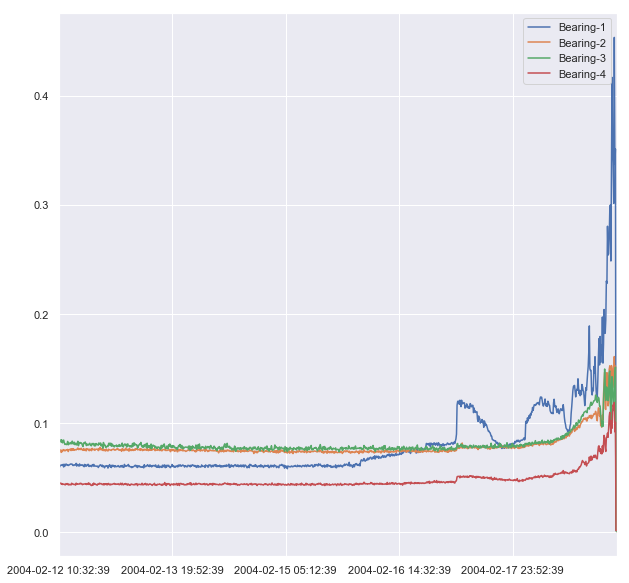

In [17]:
merged_database.plot(figsize = (10, 10))

# Setting Train/Test Databases

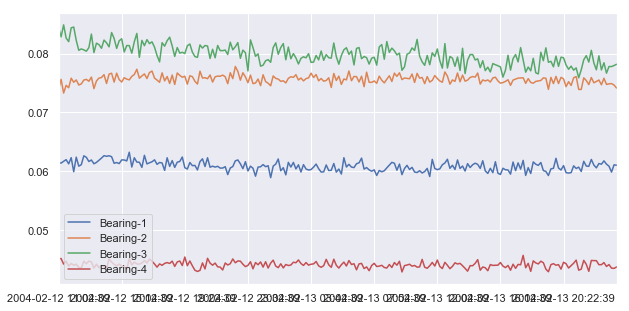

In [18]:
# Dataset 2 (Taking NORMAL data to train the model)
train_dataset = merged_database['2004-02-12 11:02:39':'2004-02-13 23:52:39']
test_dataset = merged_database['2004-02-13 23:52:39' :]

train_dataset.plot(figsize = (10, 5))

# Normalizing Train/Test Data

In [19]:
def scaling_data(train_dataset, test_dataset):
    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(train_dataset), 
                          columns=train_dataset.columns,
                          index=train_dataset.index)
    
    # Randomly shuffle training database
    X_train.sample(frac=1)
    
    X_test = pd.DataFrame(scaler.transform(test_dataset), 
                          columns=test_dataset.columns,
                          index=test_dataset.index)
    return (X_train, X_test)

In [20]:
X_train, X_test = scaling_data(train_dataset, test_dataset)

# Building Auto-Encoder Neural Network

In [21]:
BATCH_SIZE = 10
EPOCHS = 100
DROPOUT_RATE = 0.2

In [22]:
def autoencoder_model(dropout_rate):
    # Input Layer
    input_x = Input(shape=(X_train.shape[1],))

    # Hidden Layer # 1
    X = Dense(10, use_bias=True, kernel_initializer='glorot_uniform',name='Hidden_1')(input_x)
    X = Dropout(rate=dropout_rate, name='Dropout_1')(X)
    X = ReLU(negative_slope=0, name='RELU_1')(X)

    # Hidden Layer # 2
    X = Dense(6, use_bias=True, kernel_initializer='glorot_uniform',name='Hidden_2')(X)
    X = ReLU(negative_slope=0, name='RELU_2')(X)

    # Hidden Layer # 3
    X = Dense(2, use_bias=True, kernel_initializer='glorot_uniform', name='Hidden_3')(X)
    X = ReLU(negative_slope=0, name='RELU_3')(X)
    
    # Hidden Layer # 4
    X = Dense(6, use_bias=True, kernel_initializer='glorot_uniform',name='Hidden_4')(X)
    X = ReLU(negative_slope=0, name='RELU_4')(X)

    # Hidden Layer # 5
    X = Dense(10, use_bias=True, kernel_initializer='glorot_uniform', name='Hidden_5')(X)
    X = ReLU(negative_slope=0, name='RELU_5')(X)

    # Output Layer
    output_x = Dense(X_train.shape[1], use_bias=True, kernel_initializer='glorot_uniform', name='Output')(X)

    # Defining the model
    model = Model(inputs=[input_x], outputs=[output_x])
    return model

In [23]:
model = autoencoder_model(DROPOUT_RATE)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 10)                50        
_________________________________________________________________
Dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
RELU_1 (ReLU)                (None, 10)                0         
_________________________________________________________________
Hidden_2 (Dense)             (None, 6)                 66        
_________________________________________________________________
RELU_2 (ReLU)                (None, 6)                 0         
_________________________________________________________________
Hidden_3 (Dense)             (None, 2)                 14    

In [24]:
# Configuring the model for training
model.compile(optimizer='adam', loss='mse')

In [25]:
# Initializing TensorBoard callbacks
log_dir = '.\\logs\\fit\\' +  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [26]:
# Training the model
history = model.fit(x=np.array(X_train), y=np.array(X_train), batch_size=BATCH_SIZE,
                           epochs=EPOCHS, validation_split=0.05, verbose = 1,
                           callbacks=[tensorboard_callback])

Train on 210 samples, validate on 12 samples
Epoch 1/100
210/210 [==============================] - 0s 2ms/sample - loss: 0.2127 - val_loss: 0.1266
Epoch 2/100
210/210 [==============================] - 0s 149us/sample - loss: 0.1427 - val_loss: 0.0815
Epoch 3/100
210/210 [==============================] - 0s 134us/sample - loss: 0.0815 - val_loss: 0.0563
Epoch 4/100
210/210 [==============================] - 0s 157us/sample - loss: 0.0493 - val_loss: 0.0409
Epoch 5/100
210/210 [==============================] - 0s 133us/sample - loss: 0.0343 - val_loss: 0.0305
Epoch 6/100
210/210 [==============================] - 0s 162us/sample - loss: 0.0283 - val_loss: 0.0264
Epoch 7/100
210/210 [==============================] - 0s 164us/sample - loss: 0.0283 - val_loss: 0.0257
Epoch 8/100
210/210 [==============================] - 0s 142us/sample - loss: 0.0277 - val_loss: 0.0247
Epoch 9/100
210/210 [==============================] - 0s 133us/sample - loss: 0.0280 - val_loss: 0.0244
Epoch 10/100

Epoch 78/100
210/210 [==============================] - 0s 133us/sample - loss: 0.0176 - val_loss: 0.0205
Epoch 79/100
210/210 [==============================] - ETA: 0s - loss: 0.024 - 0s 133us/sample - loss: 0.0179 - val_loss: 0.0203
Epoch 80/100
210/210 [==============================] - 0s 138us/sample - loss: 0.0179 - val_loss: 0.0212
Epoch 81/100
210/210 [==============================] - 0s 124us/sample - loss: 0.0178 - val_loss: 0.0200
Epoch 82/100
210/210 [==============================] - 0s 153us/sample - loss: 0.0176 - val_loss: 0.0205
Epoch 83/100
210/210 [==============================] - 0s 143us/sample - loss: 0.0184 - val_loss: 0.0209
Epoch 84/100
210/210 [==============================] - 0s 142us/sample - loss: 0.0182 - val_loss: 0.0205
Epoch 85/100
210/210 [==============================] - 0s 138us/sample - loss: 0.0177 - val_loss: 0.0212
Epoch 86/100
210/210 [==============================] - 0s 139us/sample - loss: 0.0176 - val_loss: 0.0203
Epoch 87/100
210/210 [

In [27]:
def plot_learning_rates(history):
    plt.plot(history.history['loss'],'b', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss, [mse]')
    plt.ylim([0, 0.1])
    plt.show()

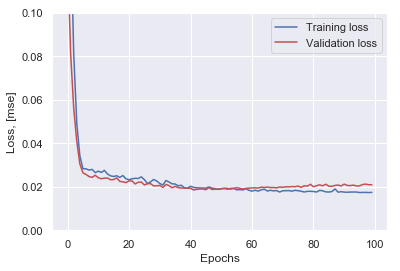

In [28]:
plot_learning_rates(history) 

# Setting a right Threshold for Anomaly Detection

(0.0, 0.5)

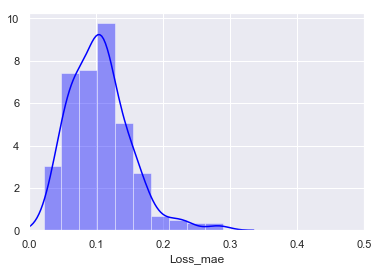

In [29]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, columns=X_train.columns, index=X_train.index)

recon_error = pd.DataFrame(index=X_train.index)
recon_error['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)

plt.figure()
sns.distplot(recon_error['Loss_mae'],bins = 10, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [30]:
# Picking the right threshold from distribution data shown above
THRESHOLD = 0.3

# Making Predictions on Test set

In [31]:
X_pred_test = model.predict(np.array(X_test))
X_pred_test = pd.DataFrame(X_pred_test, columns=X_test.columns, index=X_test.index)

In [32]:
recon_error_test = pd.DataFrame(index=X_test.index)
recon_error_test['Loss_mae'] = np.mean(np.abs(X_pred_test-X_test), axis = 1)
recon_error_test['Threshold'] = THRESHOLD
recon_error_test['Anomaly'] = recon_error_test['Loss_mae'] > recon_error_test['Threshold']
recon_error_test.head()

,Loss_mae,Threshold,Anomaly
2004-02-13 23:52:39,0.129446,0.3,False
2004-02-14 00:02:39,0.111461,0.3,False
2004-02-14 00:12:39,0.039296,0.3,False
2004-02-14 00:22:39,0.118066,0.3,False
2004-02-14 00:32:39,0.119714,0.3,False


In [33]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, columns=X_train.columns)
X_pred_train.index = X_train.index

recon_error_train = pd.DataFrame(index=X_train.index)
recon_error_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
recon_error_train['Threshold'] = THRESHOLD
recon_error_train['Anomaly'] = recon_error_train['Loss_mae'] > recon_error_train['Threshold']
recon_error = pd.concat([recon_error_train, recon_error_test])

# Plotting the results

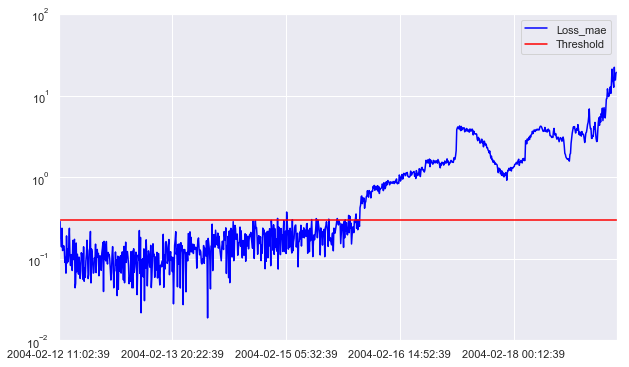

In [34]:
recon_error.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [40]:
%tensorboard --logdir=logs/fit --host=localhost --port=8080

Reusing TensorBoard on port 8080 (pid 26528), started 0:03:58 ago. (Use '!kill 26528' to kill it.)